In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

In [2]:
path = "https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Housing%20Dataset%20of%205000%20people%20staying%20in%20USA/USA_Housing.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
data.drop('Address', axis = 1, inplace = True)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [7]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06


In [8]:
data.shape

(5000, 6)

In [9]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
corr = data.corr()

<AxesSubplot:>

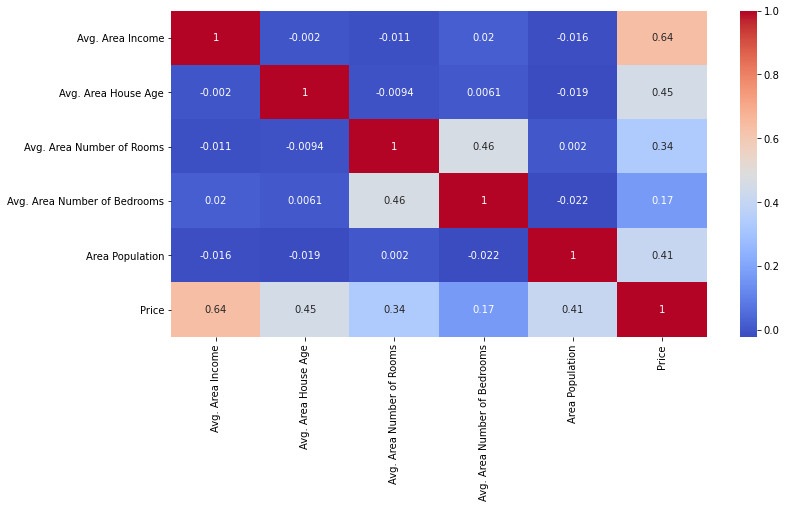

In [13]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Price', ylabel='Count'>

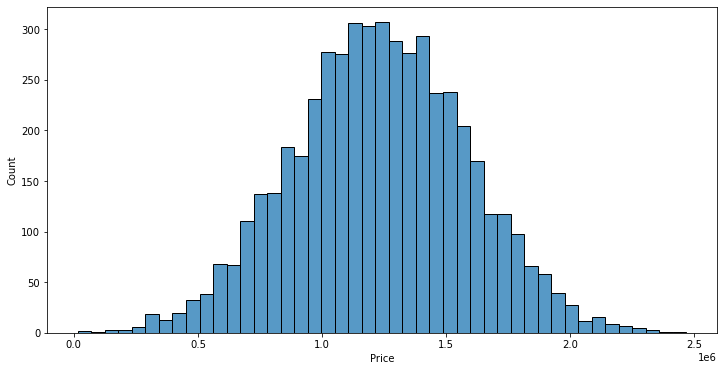

In [15]:
plt.figure(figsize = (12, 6))
sns.histplot(data["Price"])

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Avg. Area Number of Rooms'>

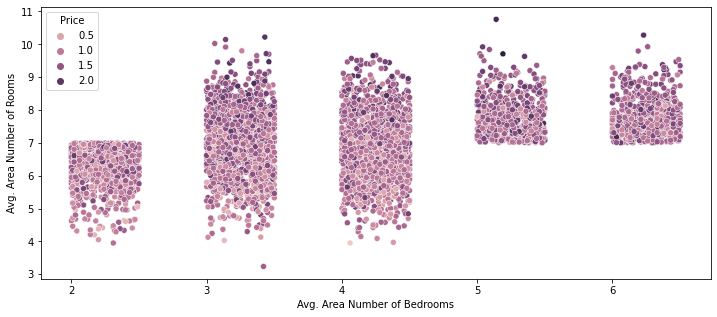

In [17]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'Avg. Area Number of Bedrooms', 
                y = 'Avg. Area Number of Rooms',
                data = data,
                hue = 'Price')

array([[<AxesSubplot:title={'center':'Avg. Area Income'}>,
        <AxesSubplot:title={'center':'Avg. Area House Age'}>],
       [<AxesSubplot:title={'center':'Avg. Area Number of Rooms'}>,
        <AxesSubplot:title={'center':'Avg. Area Number of Bedrooms'}>],
       [<AxesSubplot:title={'center':'Area Population'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

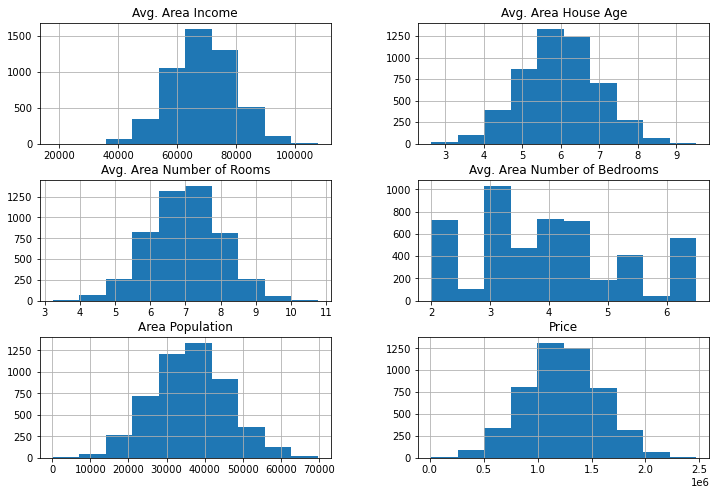

In [18]:
data.hist(figsize=(12,8))

In [21]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [22]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928


In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train[:5]

array([[0.56095474, 0.46270209, 0.51266213, 0.47333333, 0.39853952],
       [0.41338157, 0.54393269, 0.64617849, 0.28888889, 0.68361739],
       [0.54129532, 0.54916462, 0.77562222, 0.44888889, 0.47154532],
       [0.56728429, 0.49790651, 0.56443296, 0.23333333, 0.38904601],
       [0.66104495, 0.80233195, 0.59398175, 0.31555556, 0.53619209]])

In [26]:
y_test[:5]

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
Name: Price, dtype: float64

In [27]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [28]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train.to_numpy(), y_test.to_numpy()

In [29]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [40]:
X_train.shape, X_test.shape

((4000, 5), (1000, 5))

In [41]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9179971706834331

In [42]:
mean_absolute_error(y_test, y_pred)

80879.09723489445

<AxesSubplot:>

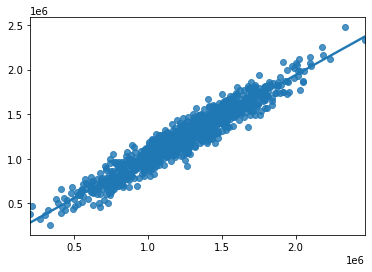

In [43]:
sns.regplot(x= y_test, y = y_pred)

In [44]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                            patience=3)
tf.random.set_seed(42)

model = tf.keras.Sequential([ 
  tf.keras.layers.Dense(28),
  tf.keras.layers.Dense(1) 
])

model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

model_history = model.fit(X_train, 
                          y_train, 
                          epochs=500,
                          validation_data = (X_test, y_test),
                          callbacks=[callback])

Epoch 1/500
125/125 [==============================] - 1s 4ms/step - loss: 1229563.0000 - mae: 1229563.0000 - val_loss: 1242000.6250 - val_mae: 1242000.6250
Epoch 2/500
125/125 [==============================] - 0s 2ms/step - loss: 1228980.5000 - mae: 1228980.5000 - val_loss: 1239713.5000 - val_mae: 1239713.5000
Epoch 3/500
125/125 [==============================] - 0s 3ms/step - loss: 1203602.8750 - mae: 1203602.8750 - val_loss: 1139862.8750 - val_mae: 1139862.8750
Epoch 4/500
125/125 [==============================] - 0s 2ms/step - loss: 614405.9375 - mae: 614405.9375 - val_loss: 220404.4531 - val_mae: 220404.4531
Epoch 5/500
125/125 [==============================] - 0s 2ms/step - loss: 220359.7500 - mae: 220359.7500 - val_loss: 213751.6562 - val_mae: 213751.6562
Epoch 6/500
125/125 [==============================] - 0s 3ms/step - loss: 214915.1406 - mae: 214915.1406 - val_loss: 208353.3125 - val_mae: 208353.3125
Epoch 7/500
125/125 [==============================] - 0s 2ms/step - l

<AxesSubplot:>

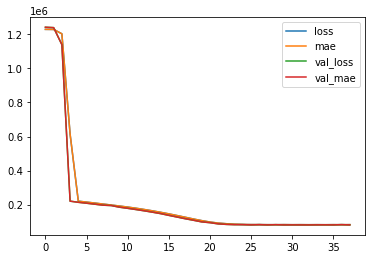

In [45]:
pd.DataFrame(model_history.history).plot()

In [47]:
y_pred_nn = model.predict(X_test)

In [48]:
r2_score(y_test, y_pred_nn)

0.9180096935413209

In [49]:
mean_absolute_error(y_test, y_pred_nn)

80923.26426732122

<AxesSubplot:>

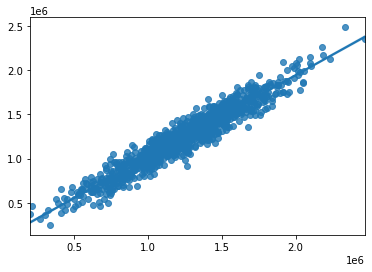

In [50]:
sns.regplot(x= y_test, y = y_pred_nn)